# Data Preprocessing

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Loading dataset (taking a basic housing dataset to predict the house prices)

df=pd.read_csv('Housing.csv')

# Convert binary categorical variables to 1/0
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for col in binary_cols:
    df[col] = df[col].map({'yes': 1, 'no': 0, 'Yes': 1, 'No': 0})

# print("\nAfter converting binary categorical variables:")
# print(df[binary_cols].head())

# One-hot encode 'furnishingstatus'
df = pd.get_dummies(df, columns=['furnishingstatus'], drop_first=True)


# Convert boolean columns to integers (0/1)
boolean_cols = ['furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished']
for col in boolean_cols:
    df[col] = df[col].astype(int)

# Separate features and target
X = df.drop('price', axis=1)
y = df['price']

print(y.head())

0    13300000
1    12250000
2    12250000
3    12215000
4    11410000
Name: price, dtype: int64


### Normalize feature 
🔹 Why Normalize?
Linear regression (especially with gradient descent) is sensitive to the scale of input features.

If one feature has values in the range of thousands (e.g., square footage) and another in tens (e.g., number of bedrooms), the larger feature can dominate the gradient updates, leading to:

Slow convergence

Numerical instability

Poor model performance

🔹 What is StandardScaler()?
StandardScaler is a tool that standardizes features by removing the mean and scaling to unit variance. Mathematically, it transforms each feature using:


X_scaled=(x−μ)/σ
 
Where:

μ = mean of the feature

σ = standard deviation of the feature

In [16]:
# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and validation sets
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)



# Pure Python Implementation

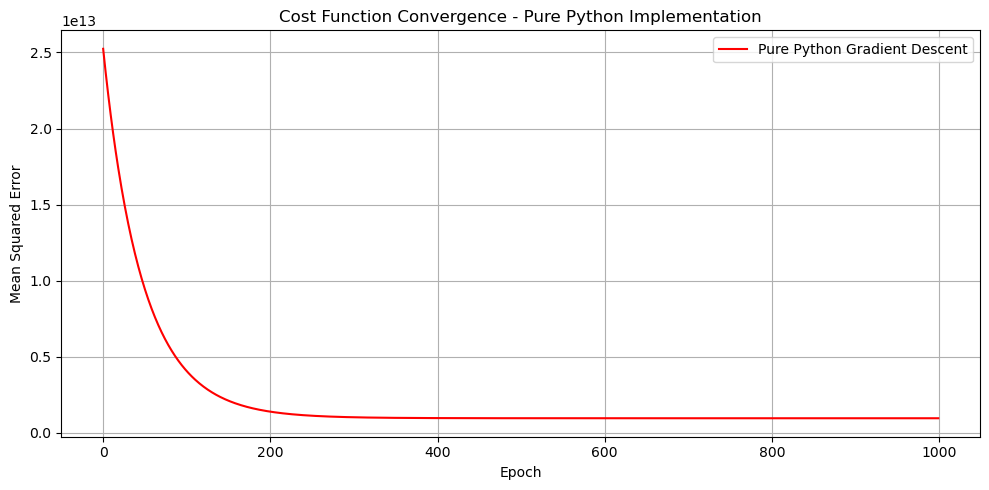


Validation Results:
MAE:  969206.25
RMSE: 1324170.42
R²:   0.6531

Convergence Time (Pure Python): 3.9240 seconds



In [34]:
import random
import math
import time
import matplotlib.pyplot as plt

#making lists for pure py imple
X_train_list = X_train.tolist()
y_train_list = y_train.tolist()
X_val_list = X_val.tolist()
y_val_list = y_val.tolist()



def predict(X, weights, bias):
    return [sum(x_i * w_i for x_i, w_i in zip(x, weights)) + bias for x in X]

def mean_squared_error(y_true, y_pred):
    return sum((yt - yp) ** 2 for yt, yp in zip(y_true, y_pred)) / len(y_true)

def mean_absolute_error(y_true, y_pred):
    return sum(abs(yt - yp) for yt, yp in zip(y_true, y_pred)) / len(y_true)

def rmse(y_true, y_pred):
    return math.sqrt(mean_squared_error(y_true, y_pred))

def r2_score(y_true, y_pred):
    mean_y = sum(y_true) / len(y_true)
    ss_tot = sum((yt - mean_y) ** 2 for yt in y_true)
    ss_res = sum((yt - yp) ** 2 for yt, yp in zip(y_true, y_pred))
    return 1 - (ss_res / ss_tot)

def gradient_descent(X, y, lr=0.01, epochs=1000):
    n_samples = len(y)
    n_features = len(X[0])
    weights = [random.uniform(-1, 1) for _ in range(n_features)]
    bias = 0
    cost_history = []

    for epoch in range(epochs):
        y_pred = predict(X, weights, bias)
        error = [yp - yt for yp, yt in zip(y_pred, y)]

        # Compute gradients
        grad_w = [sum(e * X[i][j] for i, e in enumerate(error)) / n_samples for j in range(n_features)]
        grad_b = sum(error) / n_samples

        # Update weights and bias
        weights = [w - lr * gw for w, gw in zip(weights, grad_w)]
        bias -= lr * grad_b

        # Compute and store cost
        cost = mean_squared_error(y, y_pred)
        cost_history.append(cost)

        # # Optionally print progress
        # if epoch % 100 == 0:
        #     print(f"Epoch {epoch}: Cost = {cost:.4f}")

    return weights, bias, cost_history


# Training this model and calculating convg time too
starttime=time.time()
weights, bias, cost_history = gradient_descent(X_train_list, y_train_list, lr=0.01, epochs=1000)
endtime=time.time()
convg1_time=endtime-starttime



# Plot convergence
plt.figure(figsize=(10, 5))
plt.plot(range(len(cost_history)), cost_history, label='Pure Python Gradient Descent', color='red')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.title('Cost Function Convergence - Pure Python Implementation')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Evaluation on validation set
y_pred_val = predict(X_val_list, weights, bias)

mae_pure = mean_absolute_error(y_val_list, y_pred_val)
rmse_pure = rmse(y_val_list, y_pred_val)
r2_pure = r2_score(y_val_list, y_pred_val)

# Outputs
print(f"\nValidation Results:")
print(f"MAE:  {mae_pure:.2f}")
print(f"RMSE: {rmse_pure:.2f}")
print(f"R²:   {r2_pure:.4f}")
print(f"\nConvergence Time (Pure Python): {convg1_time:.4f} seconds")
print()

# Optimized NumPy Implementation

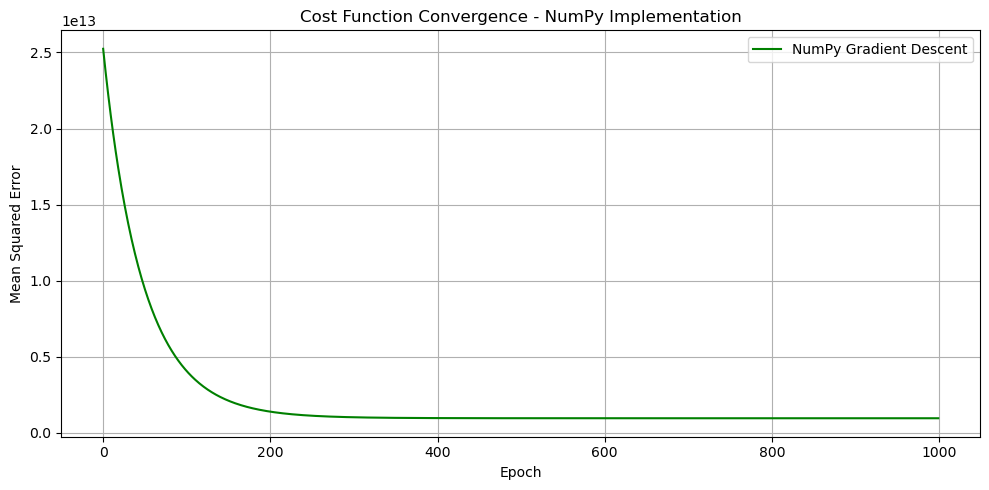

Convergence Time: 0.0848 seconds
Validation Metrics (NumPy):
MAE:  969206.24
RMSE: 1324170.42
R²:   0.6531


In [35]:
import numpy as np

#getting it in numpyy array
X_train_np = np.array(X_train)
y_train_np = np.array(y_train).reshape(-1, 1)
X_val_np = np.array(X_val)
y_val_np = np.array(y_val).reshape(-1, 1)


def mean_absolute_error2(y_true, y_pred):
    mae2 = np.mean(np.abs(y_true - y_pred))
    return mae2
    
def rmse2(y_true, y_pred):
    rmse2 = np.sqrt(np.mean((y_true - y_pred) ** 2))
    return rmse2

def r2_score2(y_true, y_pred):
    r2 = 1 - (np.sum((y_true - y_pred)**2) / np.sum((y_true - np.mean(y_true))**2))
    return r2


#gradient descent using numpy
def numpy_gradient_descent(X, y, lr=0.01, epochs=1000):
    n_samples, n_features = X.shape
    weights = np.random.uniform(-1, 1, (n_features, 1))
    bias = 0
    cost_history = []

    for epoch in range(epochs):
        y_pred = np.dot(X, weights) + bias
        error = y_pred - y

        grad_w =  np.dot(X.T, error) / n_samples
        grad_b = np.sum(error) / n_samples

        weights -= lr * grad_w
        bias -= lr * grad_b

        cost = np.mean((error) ** 2)
        cost_history.append(cost)

    return weights, bias, cost_history

# Training this model and calculating convg time too
start_time2 = time.time()
weights_np, bias_np, cost_history_np = numpy_gradient_descent(X_train_np, y_train_np, lr=0.01, epochs=1000)
convg2_time = time.time() - start_time2

# Predictions and Evaluation
y_pred_val_np = np.dot(X_val_np, weights_np) + bias_np
mae_np, rmse_np, r2_np = mean_absolute_error2(y_val_np, y_pred_val_np), rmse2(y_val_np, y_pred_val_np), r2_score2(y_val_np, y_pred_val_np)

# Plot convergence
plt.figure(figsize=(10, 5))
plt.plot(range(len(cost_history_np)), cost_history_np, label='NumPy Gradient Descent', color='green')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.title('Cost Function Convergence - NumPy Implementation')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Outputs
print(f"Convergence Time: {convg2_time:.4f} seconds")
print("Validation Metrics (NumPy):")
print(f"MAE:  {mae_np:.2f}")
print(f"RMSE: {rmse_np:.2f}")
print(f"R²:   {r2_np:.4f}")

# Scikit-learn Implementation

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Train using Scikit-learn
lr_model = LinearRegression()
start_time = time.time() # Calculating fitting time only as asked  
lr_model.fit(X_train, y_train)
skl_time = time.time() - start_time

# Prediction
y_pred_skl = lr_model.predict(X_val)

# performance metrics
mae_skl = mean_absolute_error(y_val, y_pred_skl)
rmse_skl = np.sqrt(mean_squared_error(y_val, y_pred_skl))
r2_skl = r2_score(y_val, y_pred_skl)

# Output
print(f"Scikit-learn Convergence Time: {skl_time:.4f} seconds")
print("Validation Metrics (Scikit-learn):")
print(f"MAE:  {mae_skl:.2f}")
print(f"RMSE: {rmse_skl:.2f}")
print(f"R²:   {r2_skl:.4f}")


Scikit-learn Convergence Time: 0.0036 seconds
Validation Metrics (Scikit-learn):
MAE:  970043.40
RMSE: 1324506.96
R²:   0.6529


# regression metrics across all three method

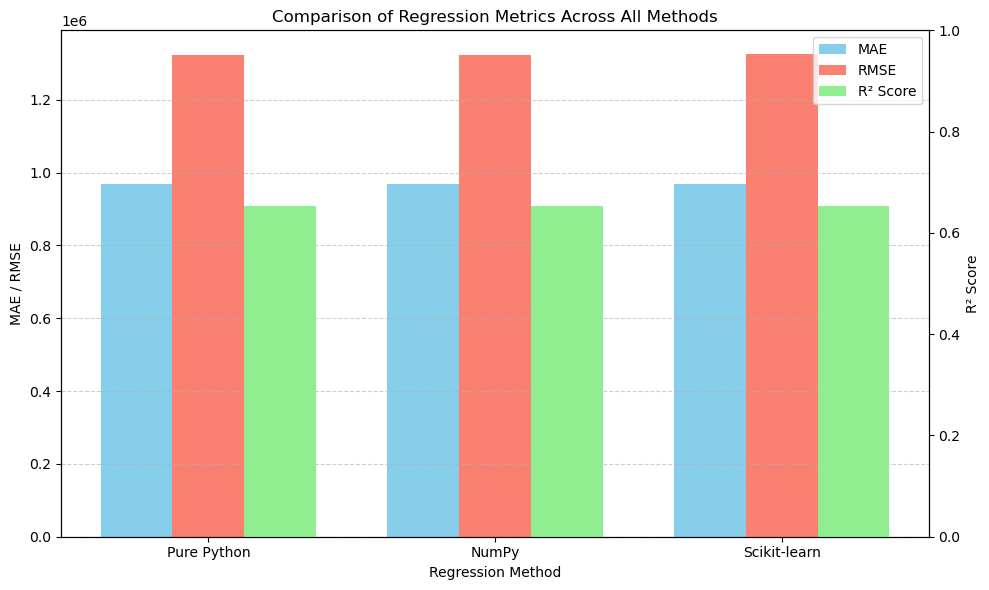

In [38]:

mae_vals = [mae_pure, mae_np, mae_skl]
rmse_vals = [rmse_pure, rmse_np, rmse_skl]
r2_vals = [r2_pure, r2_np, r2_skl]

methods = ['Pure Python', 'NumPy', 'Scikit-learn']
x = np.arange(len(methods))
width = 0.25

fig, ax1 = plt.subplots(figsize=(10, 6))


bar1 = ax1.bar(x - width, mae_vals, width, label='MAE', color='skyblue')
bar2 = ax1.bar(x, rmse_vals, width, label='RMSE', color='salmon')
ax1.set_ylabel('MAE / RMSE')
ax1.set_xlabel('Regression Method')
ax1.set_xticks(x)
ax1.set_xticklabels(methods)
ax1.grid(axis='y', linestyle='--', alpha=0.6)


ax2 = ax1.twinx()
bar3 = ax2.bar(x + width, r2_vals, width, label='R² Score', color='lightgreen')
ax2.set_ylabel('R² Score')
ax2.set_ylim(0, 1)  


bars1, labels1 = ax1.get_legend_handles_labels()
bars2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(bars1 + bars2, labels1 + labels2, loc='upper right')

plt.title('Comparison of Regression Metrics Across All Methods')
plt.tight_layout()
plt.show()
